In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hurst

In [2]:
import statsmodels.api as sm
import scipy.stats as sps
pd.set_option('expand_frame_repr', False)

df= pd.read_csv('BTC-USDT_Hourly chart - Binance_BTCUSDT_1h (1).csv')
# df = pd.read_csv("F:\\Work\\Delta\\Backtesting\\hurst\\inputdata_hurst.csv", index_col = 0, low_memory=False)

# df = pd.read_csv('F:\\Work\\Datasets\\crypto\\1min\\BTCUSDT_4hformatted.csv')

# hurst_np = np.array([])
# H, c, data = hurst.compute_Hc(df['close'], kind='price', simplified=True)
# ######################################################################################################################

# df['meet_hurst'] = 0
# df['meet_c'] = 0
# for i in range(401, (len(df))):
# #     print(i)
#     H, c, data = hurst.compute_Hc(df['close'].iloc[i - 400:i], kind='price', simplified=True)
#     df['meet_hurst'].iloc[i] = H
#     df['meet_c'].iloc[i] = float(c)

In [3]:
hurst_np = np.array([])
H, c, data = hurst.compute_Hc(df['close'], kind='price', simplified=True)
######################################################################################################################

df['meet_hurst'] = 0
df['meet_c'] = 0
for i in range(1025, (len(df))):
#     print(i)
    H, c, data = hurst.compute_Hc(df['close'].iloc[i - 1024:i], kind='price', simplified=True)
    df['meet_hurst'].loc[i] = H
    df['meet_c'].loc[i] = float(c)

C:\Users\ROHIT JAISWAL\AppData\Local\Temp\ipykernel_13224\3685893027.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['meet_hurst'].loc[i] = H
C:\Users\ROHIT JAISWAL\AppData\Local\Temp\ipykernel_13224\3685893027.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['meet_c'].loc[i] = float(c)


In [4]:
# hurst mean = 0.590541842
hm = 0.5758797600133411


In [5]:
df['meet_hurst'].head(1026
        
       )

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
1021    0.000000
1022    0.000000
1023    0.000000
1024    0.000000
1025    0.521586
Name: meet_hurst, Length: 1026, dtype: float64

<AxesSubplot:>

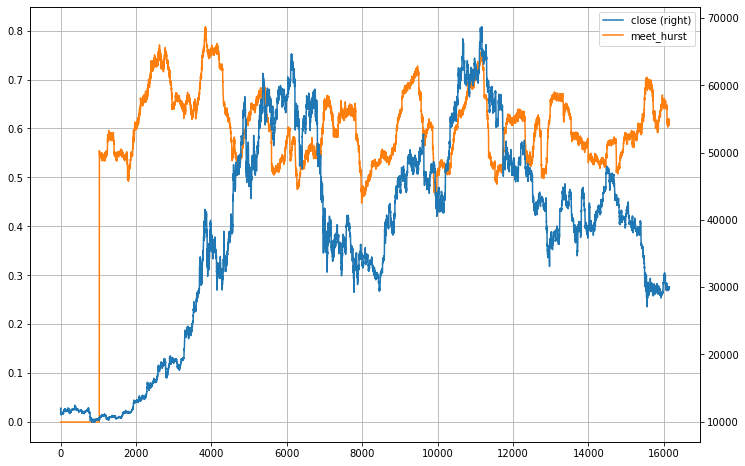

In [6]:
df[['close' , 'meet_hurst']].plot(secondary_y='close', grid=True, figsize=(12, 8))

In [7]:
# df['ema_12'] = df1b['Close'].ewm(span=12, adjust=False).mean() 
# df['ema_26'] = df1b['Close'].ewm(span=12, adjust=False).mean() 
# df['ema_9'] = df1b['Close'].ewm(span=12, adjust=False).mean() 

In [8]:
df['ema26'] = df['close'].ewm(span=26, adjust=False).mean()
df['ema12'] = df['close'].ewm(span=12, adjust=False).mean()
df['MACD'] = df['ema12'] - df['ema26']
df['ema5'] = df['close'].ewm(span = 9, adjust = False).mean()
df['signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

# df[['signal', 'MACD', 'close']].plot(figsize=(12, 8), grid=True, secondary_y='close')


In [36]:
df['position'] = np.where(((df['MACD'] > df['signal'])  & (df['meet_hurst']>  0.5 ) ) , 1 , 0 )
# df['position'] = np.where(((df['MACD'] < df['signal'])  & (df['meet_hurst']> 0.4)), -1, df['position'])

df['position'] = df['position'].shift(1)

In [37]:
# df['position'] = np.where(((df['ema5'] > df['ema26']) & (df['meet_hurst']>  0.4)), 1, 0)
# # df['position'] = np.where(((df['ema5'] < df['ema26']) & (df['meet_hurst']>  0.55)), -1, df['position'])
# df['position'] = df['position'].shift(1)

<AxesSubplot:>

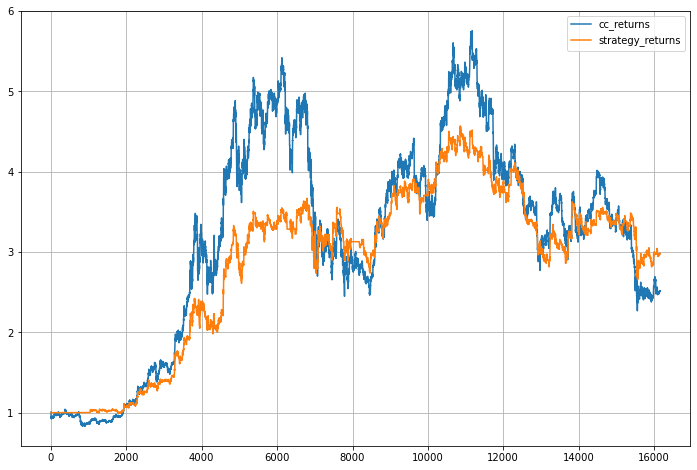

In [38]:
df['cc_returns'] = df['close'].pct_change()
df['strategy_returns'] = df['cc_returns'] * df['position']
# df['cc_returns'] = 1 + df['cc_returns']

# df['cumulative_returns'] = (1 + df['strategy_returns']).cumprod() - 1

# df['bnh_returns'] = (1 + df['cc_returns']).cumprod() - 1
# df['strategy_return'] = df['position']*df['return']
df['strategy_returns'] = 1 + df['strategy_returns']
df['cc_returns'] = 1+df['cc_returns']

df[['cc_returns', 'strategy_returns']] = df[['cc_returns', 'strategy_returns']].cumprod()

# df[['cc_returns', 'strategy_returns','close']].plot(figsize=(12, 8), grid=True, secondary_y ='close')
df[['cc_returns', 'strategy_returns' ]].plot(secondary_y='close', grid=True, figsize=(12, 8))

In [64]:
df.tail()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount,...,ema26,ema12,MACD,signal,position,cc_returns,strategy_returns,cumulative_returns,bnh_returns,ema5
16146,1654459200000,2022-06-05 20:00:00,BTC/USDT,30036.3,30123.8,29923.7,29929.5,6412.831,192599256.2,76691,...,29806.644213,29869.460293,62.816080,30.194719,1.0,2.506534,1.503244,1.000600,1.506534,29946.451091
16147,1654462800000,2022-06-05 21:00:00,BTC/USDT,29929.5,29977.6,29794.6,29947.9,10392.578,310508316.7,105927,...,29817.107605,29881.527940,64.420335,37.039842,1.0,2.508075,1.504168,1.001830,1.508075,29946.934061
16148,1654466400000,2022-06-05 22:00:00,BTC/USDT,29948.0,30056.0,29859.5,30005.2,12035.678,360779339.8,118708,...,29831.040375,29900.554411,69.514036,43.534681,1.0,2.512874,1.507046,1.005660,1.512874,29966.356040
16149,1654470000000,2022-06-05 23:00:00,BTC/USDT,30004.5,30035.9,29880.3,29909.9,6591.588,197415661.1,76830,...,29836.881828,29901.992194,65.110365,47.849818,1.0,2.504893,1.502260,0.999290,1.504893,29947.537360
16150,1654473600000,2022-06-06 0:00:00,BTC/USDT,29910.0,30065.8,29876.2,30049.3,7612.315,228274489.9,69091,...,29852.616508,29924.654933,72.038425,52.687539,1.0,2.516567,1.509261,1.008608,1.516567,29981.458240


In [52]:
df.to_csv('hurst_hourly_macd_result.csv')

In [47]:
np.mean(df['meet_hurst'])

0.5758797600133411